In [1]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


client = bigquery.Client(project="airbnb-473619")

def run_query(query):
    return client.query(query).to_dataframe()

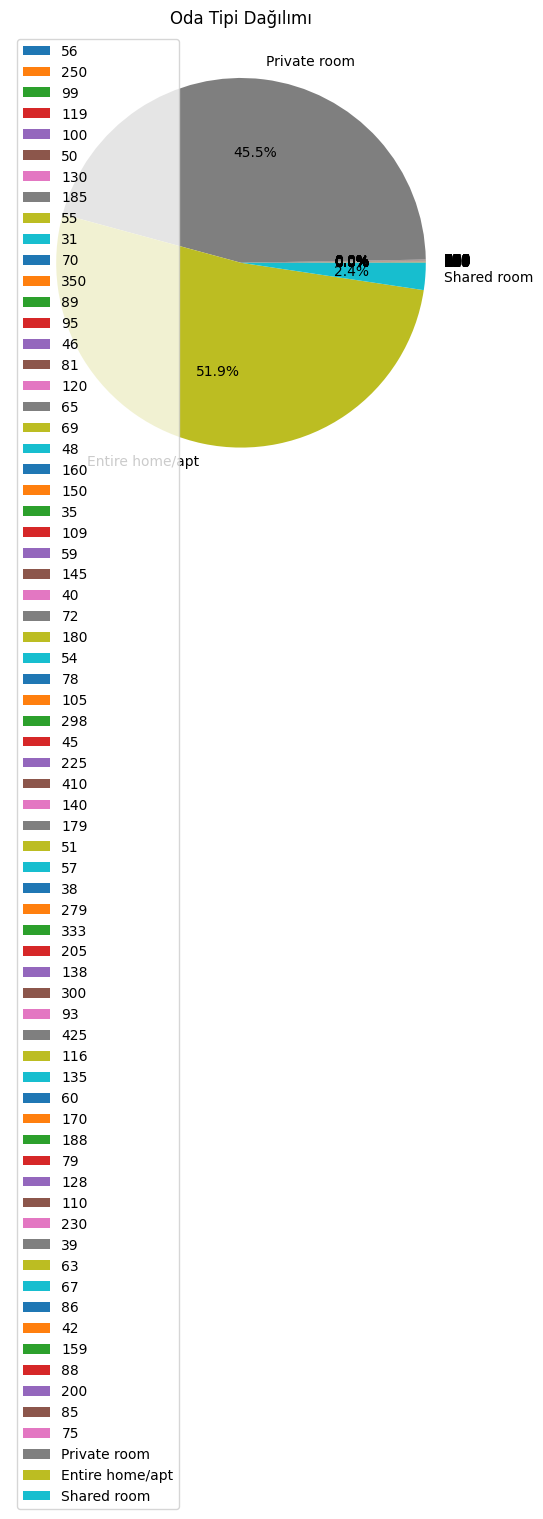

In [2]:
df_room = run_query("""
SELECT room_type, COUNT(*) as listings
FROM `airbnb_pipeline.cleaned_listings`
GROUP BY room_type
""")

df_room.plot(kind="pie", y="listings", labels=df_room["room_type"], autopct='%1.1f%%', figsize=(6,6))
plt.title("Oda Tipi Dağılımı")
plt.ylabel("")
plt.show()

In [ ]:
df_price = run_query("""
SELECT price_bucket, COUNT(*) as listings
FROM `airbnb_pipeline.cleaned_listings`
GROUP BY price_bucket
ORDER BY listings DESC
""")

sns.barplot(x="price_bucket", y="listings", data=df_price)
plt.title("Fiyat Segmenti Dağılımı")
plt.show()


In [ ]:
df_neigh = run_query("""
SELECT neighbourhood, COUNT(*) as listings
FROM `airbnb_pipeline.cleaned_listings`
GROUP BY neighbourhood
ORDER BY listings DESC
LIMIT 10
""")

sns.barplot(y="neighbourhood", x="listings", data=df_neigh)
plt.title("En Çok İlan Olan Mahalleler (Top 10)")
plt.show()


In [ ]:
df_year = run_query("""
SELECT year, COUNT(*) as reviews
FROM `airbnb_pipeline.cleaned_listings`
WHERE year IS NOT NULL
GROUP BY year
ORDER BY year
""")

sns.lineplot(x="year", y="reviews", data=df_year, marker="o")
plt.title("Yıllara Göre Review Trendleri")
plt.show()


In [ ]:
df_geo = run_query("""
SELECT latitude, longitude, price
FROM `airbnb_pipeline.cleaned_listings`
WHERE price_bucket = 'High'
LIMIT 1000
""")

plt.figure(figsize=(8,6))
plt.scatter(df_geo["longitude"], df_geo["latitude"], c=df_geo["price"], cmap="Reds", alpha=0.5)
plt.colorbar(label="Price")
plt.title("Yüksek Fiyatlı İlanların Coğrafi Dağılımı")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
df_avg_price = run_query("""
SELECT room_type, AVG(price) as avg_price
FROM `airbnb_pipeline.cleaned_listings`
GROUP BY room_type
ORDER BY avg_price DESC
""")

sns.barplot(x="room_type", y="avg_price", data=df_avg_price)
plt.title("Oda Tipine Göre Ortalama Fiyat")
plt.ylabel("Ortalama Fiyat ($)")
plt.show()


In [ ]:
df_hosts = run_query("""
SELECT host_name, COUNT(*) as listings
FROM `airbnb_pipeline.cleaned_listings`
GROUP BY host_name
ORDER BY listings DESC
LIMIT 10
""")

sns.barplot(y="host_name", x="listings", data=df_hosts)
plt.title("En Çok İlanı Olan Ev Sahipleri (Top 10)")
plt.show()


In [ ]:
df_price_reviews = run_query("""
SELECT price, number_of_reviews
FROM `airbnb_pipeline.cleaned_listings`
WHERE price < 1000 -- uç değerleri filtreledik
""")

plt.figure(figsize=(8,6))
sns.scatterplot(x="number_of_reviews", y="price", data=df_price_reviews, alpha=0.5)
plt.title("Fiyat ve Review Sayısı İlişkisi")
plt.xlabel("Review Sayısı")
plt.ylabel("Fiyat ($)")
plt.show()
df_availability = run_query("""
SELECT availability_flag, price
FROM `airbnb_pipeline.cleaned_listings`
WHERE price < 1000
""")

sns.boxplot(x="availability_flag", y="price", data=df_availability)
plt.title("Müsaitlik ve Fiyat İlişkisi")
plt.ylabel("Fiyat ($)")
plt.show()


In [ ]:
df_rpm = run_query("""
SELECT reviews_per_month
FROM `airbnb_pipeline.cleaned_listings`
WHERE reviews_per_month IS NOT NULL
""")

plt.figure(figsize=(8,6))
sns.histplot(df_rpm["reviews_per_month"], bins=30, kde=True)
plt.title("Reviews per Month Dağılımı")
plt.xlabel("Reviews per Month")
plt.ylabel("Frekans")
plt.show()